In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from scipy import stats

# Question 1

## **Part 1.1: Work**



#### Read Data

In [3]:
PATH_TO_Q1_DATA = 'data/HW1_Q1_Data.csv'
df = pd.read_csv(PATH_TO_Q1_DATA) 

In [4]:
df.head(1)

,S IgG1,RBD IgG1,N IgG1,S IgG2,RBD IgG2,N IgG2,S IgG3,RBD IgG3,N IgG3,S IgG4,...,NT50,Sex,Race,Age,Remdesivir,Antibiotics,Chloroquines,Tocilizumab,Ards,Outcome
0,15518.25,11686.5,17408.0,2595.0,2977.5,4418.75,7988.75,10112.75,13740.75,2890.5,...,264.0,Male,Black,60-69,No,Yes,Yes,No,Yes,Died


#### Standardize Data in Columns 1-52

In [5]:
'''
 TODO: Standardize columns 1-52 by subtracting off mean of each column and scaling to unit variance
'''
cols = df.columns.values.tolist()[0:52] # get list of columns names for columns 1-52

for col in cols:
    if '_zscore' not in col: # to allow re-execution of same cell multiple times
        col_zscore = col + '_zscore' # add column for zscore
    df[col_zscore] = (df[col] - df[col].mean())/ df[col].std() # z =(x-μ)/σ  #??std(ddof=??) degrees of freedom

#### Cluster Standardized Data in Columns 1-52

In [6]:
# need to choose distance measure, if already choose Euclidean??
# other quality checks if don't know true labels??
kmeans_possible_cluster_nums = [2,3,4,5,6,7,8,9,10] # 1 < k < 11
df_standardized_only = df.iloc[:,61:] # get dataframe with standardized columns only

kmeans_cluster_quality_scores = []
for k in kmeans_possible_cluster_nums:
    '''
    TODO: 1. Fit data to k clusters using imported clustering algorithm
          2. Compute quality of results for k clusters using imported
             cluster quality metric and store in a list
    '''
    kmeans = KMeans(n_clusters=k).fit(df_standardized_only)
    labels = kmeans.labels_
    score = metrics.silhouette_score(df_standardized_only, labels) # quality
    kmeans_cluster_quality_scores.append(score)

In [7]:
kmeans_cluster_quality_scores

[0.596020600071851,
 0.2896940008974808,
 0.2947681275498017,
 0.29038266395559587,
 0.2975457234378132,
 0.32302316712858214,
 0.25668866186768324,
 0.2647784851803257,
 0.26414911620419734]

#### Dimensionality Reduction and Visualization of Data

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

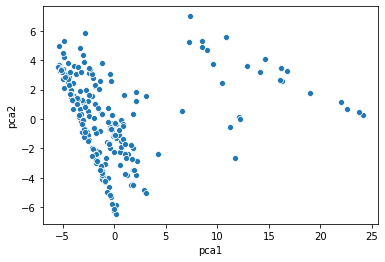

In [8]:
## how to connect true labels to this?? we don't know true labels...
## how to visualize k-means clusters??

pca = PCA(n_components=2).fit_transform(df_standardized_only)
df_pca_plot = pd.DataFrame(pca, columns=['pca1','pca2'])
sns.scatterplot(x='pca1', y='pca2', data=df_pca_plot, legend='full')

#### Visualize Cluster Quality Metrics

In [9]:
# Creates line chart to visualize values of cluster quality metric for each possible number of clusters
def plotMetricByK(metric_name, metric_results, num_possible_clusters, PATH_TO_SAVE=None):
  '''
  metric_name: Name of cluster quality metric for title and axis label
  metric_results: List containing value of metric, in order, for each
                  possible number of clusters
  PATH_TO_SAVE: Path of file to save plot. If path is not provided, image is not saved
  '''

  plt.clf()

  plt.title(f'{metric_name} by Number of Clusters')
  plt.xlabel('Number of Clusters')
  plt.ylabel(metric_name)
  plt.plot(num_possible_clusters, metric_results)
  
  if PATH_TO_SAVE:
    plt.savefig(PATH_TO_SAVE)

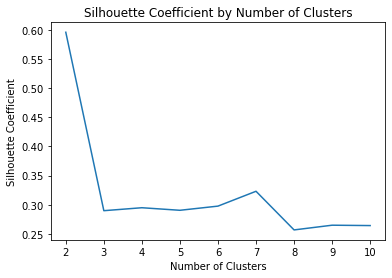

In [10]:
'''
 TODO: Plot your choice of cluster quality metric by cluster number to help determine k.

 TIP: If using the above function, place each function call in a separate 
      cell to visualize multiple cluster quality metrics
'''
plotMetricByK("Silhouette Coefficient", kmeans_cluster_quality_scores, kmeans_possible_cluster_nums)

## **Part 1.1: Answer**

How many clusters are there in the data? **There appear to be two clusters.**

Explanation: **Good clustering is indicated when the Silhouette Coefficient is close to 1. The Silhouette Coefficient is closest to 1 for two clusters and is much lower for other clustering sizes.**

## **Part 1.2: Work**

#### Cluster Data

In [11]:
'''
  TODO: Cluster data with the number of clusters you determined in part 1.1 and store resulting labels
'''
kmeans = KMeans(n_clusters=2).fit(df_standardized_only)
kmeans_labels = kmeans.labels_

# add labels as column in original df?? or better to create new df with this?
df = pd.DataFrame(df)
df['cluster']=kmeans_labels

In [12]:
kmeans_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [13]:
df.head(1)

,S IgG1,RBD IgG1,N IgG1,S IgG2,RBD IgG2,N IgG2,S IgG3,RBD IgG3,N IgG3,S IgG4,...,RBD ADCD_zscore,N ADCD_zscore,S NKD-CD107a_zscore,RBD NKD-CD107a_zscore,N NKD-CD107a_zscore,S NKD-MIP1b_zscore,RBD NKD-MIP1b_zscore,N NKD-MIP1b_zscore,NT50_zscore,cluster
0,15518.25,11686.5,17408.0,2595.0,2977.5,4418.75,7988.75,10112.75,13740.75,2890.5,...,-0.411877,0.450513,-0.02381,-0.180116,-0.576487,-0.586417,-1.100901,-0.542606,1.019302,0


#### Univariate Analysis

In [14]:
'''
  TODO: Find 4 variables that have statistically significant differences between values in the clusters (i.e p < 0.05 using pairwise t-tests)
'''
# do I need to split the data into separate dataframes per cluster to do t-test??
# degrees of freedom??

# split data by cluster
df_cluster0=df[df['cluster']==0]
df_cluster1=df[df['cluster']==1]

# create a dataframe to store test results
cols = df_standardized_only.columns.values.tolist()  # get names of standarized columns
df_ttest = pd.DataFrame(columns=['Metric','Statistic','P_value']).astype(dtype= {'Metric':'object', 'Statistic':'float64','P_value':'float64'})

# Welch's t-test
for col in cols:
    (stat, pvalue) = stats.ttest_ind(df_cluster0[col], df_cluster1[col], equal_var=False)
    new_row = pd.Series([col,stat,pvalue], index = df_ttest.columns)
    df_ttest = df_ttest.append(new_row, ignore_index=True)

In [15]:
print(df_cluster0.shape)
print(df_cluster1.shape)
df_ttest.head()

(207, 114)
(25, 114)


,Metric,Statistic,P_value
0,S IgG1_zscore,-10.536886,1.647515e-10
1,RBD IgG1_zscore,-9.685497,8.688933e-10
2,N IgG1_zscore,-17.543949,2.258925e-15
3,S IgG2_zscore,-16.184907,1.795776e-14
4,RBD IgG2_zscore,-14.480079,2.141806e-13


In [16]:
# find metrics with four lowest P-values
df_ttest.nsmallest(4,['P_value'])['Metric'].to_list()

['RBD NKD-CD107a_zscore', 'N IgG1_zscore', 'RBD IgA1_zscore', 'S IgG3_zscore']

**Part 1.2: Answer**

RBD NKD-CD107a, N IgG1, RBD IgA1, S IgG3

**Replace the above line with 4 variables that you found from the univariate analysis and output the corresponding box plots in the cells below or as images in this cell**

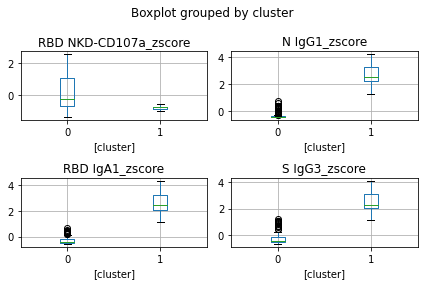

In [18]:
'''
  TODO: Create and display boxplots for each of the 4 variables like those in Fig 1. from the paper by Wu et al

  TIP: 1. If you add the cluster labels as an additional column to the dataframe, then you can follow the example at https://www.pythonprogramming.in/boxplot-group-by-column-data.html
       2. If you want to use subplots to put all 4 boxplots in the same figure, you can plot the dataframes on a specific subplot using the ax keyword. For example,
          
          fig, axs = plt.subplots(2, 2)

          df.boxplot(column=['Variable'], by=['Cluster'], ax=axs[0,0])
          df.boxplot(column=['Variable'], by=['Cluster'], ax=axs[0,1])
''' 

# how to fix labels?
# is this how it should look??
# use standardized data or original??
fig, axs = plt.subplots(2,2)

df.boxplot(column=['RBD NKD-CD107a_zscore'], by=['cluster'], ax=axs[0,0])
df.boxplot(column=['N IgG1_zscore'], by=['cluster'], ax=axs[0,1])
df.boxplot(column=['RBD IgA1_zscore'], by=['cluster'], ax=axs[1,0])
df.boxplot(column=['S IgG3_zscore'], by=['cluster'], ax=axs[1,1])

plt.tight_layout()

## **Part 1.3: Work**


In [17]:
# Formats Pandas series to string of form 'index_1: value_1, ..., index_n:, value_n' w/ indexes alphabetically sorted
def formatValueCounts(value_counts):
  '''
    value_counts: Pandas series
  '''
  count_string = value_counts.to_string()
  formatted_counts = [': '.join(count.split()) for count in count_string.split('\n')]
  formatted_counts.sort()
  return ',\n '.join(formatted_counts)

# Creates table summarizing data by cluster and categorical feature
def plotSummaryTable(cellText, PATH_TO_SAVE=None):
  '''
  cellText: num_clusters x 9 2D List where cellText[i][j] contains a string summarizing
            the statistics for cluster i and column (53 + j) in the data
  PATH_TO_SAVE: Path of file to save plot. If path is not provided, image is not saved
  '''

  k = len(cellText)
  colLabels = [f'Cluster {i + 1}' for i in range(k)]

  rowLabels = list(df.columns)[52:61]

  cellText = np.array(cellText).T

  plt.figure(figsize=(10,10))
  table = plt.table(cellText, 
              colLabels=colLabels,
              colColours=['#D3D3D3'] * len(colLabels),
              rowLabels=rowLabels,
              rowColours=['#D3D3D3'] * len(rowLabels),
              cellLoc='center',
              loc='upper center')
  table.scale(2,5)
  table.auto_set_font_size(True) # was false
#   table.set_fontsize(8)

  plt.axis('off')
  plt.grid(False)

  if PATH_TO_SAVE:
    plt.savefig(PATH_TO_SAVE)

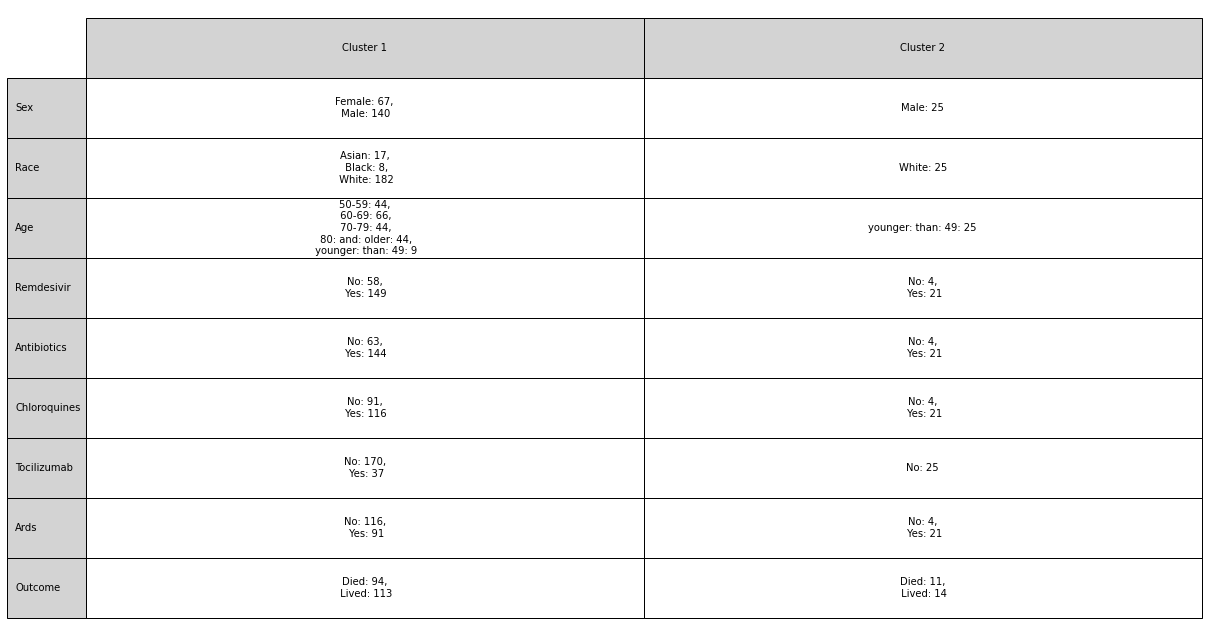

In [18]:
'''
  TODO: Create a table where the rows correspond to the variables in columns 53-61, and the columns correspond to the k clusters you identified.
        For each cell in the table, put summary statistics for that (variable, cluster) pair

  TIP: 1. If you create a 2D list, cellText, where cellText[i][j] contains a string summarizing the statistics for cluster i and column (53 + j) in
          the data, you can pass this into plotSummaryTable (provided above) to automatically create the table with matplotlib
       2. If you use value_counts() from Pandas, you can pass the resulting series to formatValueCounts (provided above) to convert it to a formatted string
'''
#'Sex','Race', 'Age', 'Remdesivir', 'Antibiotics', 'Chloroquines','Tocilizumab', 'Ards', 'Outcome'

# create 2d list to contain results
rows=2 # 2 clusters
columns=9 # 9 categorical columns
cellText=[[''] * columns for i in range(rows)]


# get summary stats for each categorical column
categorical_cols = df.columns.values.tolist()[52:61]
for i, col in enumerate(categorical_cols):
    for cluster in range(0,2):
        df_one_cluster = df[df['cluster']==cluster] # select data for only one cluster
        formatted = formatValueCounts(df_one_cluster[col].value_counts())
        cellText[cluster][i]=formatted

output_table = plotSummaryTable(cellText)
output_table

## **Part 1.3: Answer**

**Plot the table in one of the above cells or include it as an image in this cell**

Are any of the clusters significantly enriched for some particular value? **Yes. One cluster consists entirely of white males younger than 49 who didn't take Tocilizumab. The second cluster is largely white individuals older than 49, but this simply the remainder of the patients so these details are unlikely to be relevant on their own. Roughly half of the patients died in each cluster, so it's not clear if the clusters are clinically relevant.**

*Do I need to show statistically significant??*

## **Part 1.4: Work**

## Clustering

In [19]:
'''
TODO: Cluster the numeric variables (Columns 1-52) to find clusters among variables
'''
hier_possible_distance_thresholds = list(range(1,30))
df_numeric_variables = df_standardized_only.T # transpose data to cluster by metric

# hierarchical clustering for different distance thresholds
h_quality_scores = []

for d in hier_possible_distance_thresholds:
    hier = AgglomerativeClustering(n_clusters=None, distance_threshold=d).fit(df_numeric_variables)
    h_labels = hier.labels_
    h_labels
    score = metrics.silhouette_score(df_numeric_variables, h_labels)
    h_quality_scores.append((d,score))

In [20]:
h_quality_scores

[(1, 0.04381498465207157),
 (2, 0.061028385197819564),
 (3, 0.13279712186854872),
 (4, 0.15168559663433792),
 (5, 0.15012628184636384),
 (6, 0.18787001513529739),
 (7, 0.24404908059887112),
 (8, 0.2557911405197007),
 (9, 0.2601938392283203),
 (10, 0.28971297152176684),
 (11, 0.3109277177498267),
 (12, 0.3109277177498267),
 (13, 0.33004434833827606),
 (14, 0.33004434833827606),
 (15, 0.3348582675061609),
 (16, 0.3348582675061609),
 (17, 0.31947491922547433),
 (18, 0.31566997920796314),
 (19, 0.3096641777391753),
 (20, 0.29965051732110354),
 (21, 0.2901239063816258),
 (22, 0.2901239063816258),
 (23, 0.2901239063816258),
 (24, 0.2901239063816258),
 (25, 0.26250368170546834),
 (26, 0.26250368170546834),
 (27, 0.26250368170546834),
 (28, 0.26250368170546834),
 (29, 0.26250368170546834)]

## Visualization 1

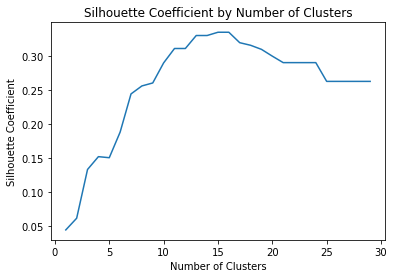

In [21]:
distances,scores = zip(*h_quality_scores)
list(scores)
plotMetricByK("Silhouette Coefficient", scores, hier_possible_distance_thresholds)

## Visualization 2

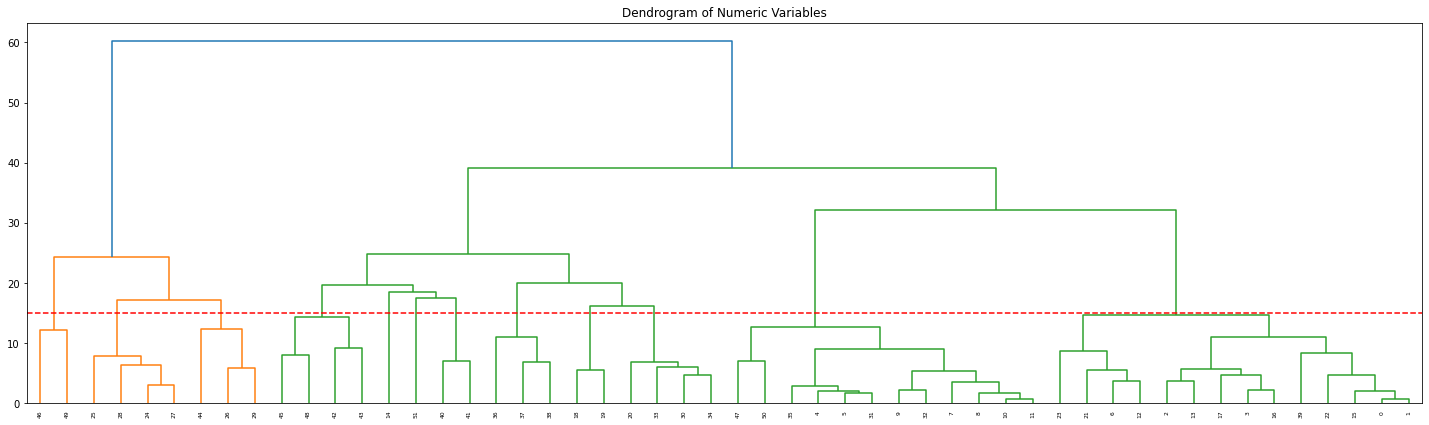

In [22]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(25,7))
plt.title("Dendrogram of Numeric Variables")
dend = shc.dendrogram(shc.linkage(df_numeric_variables, method='ward')) # ward??
plt.axhline(y=15, color='r', linestyle='--')
plt.show()

## **Part 1.4: Answer**

How many clusters are there in the numeric variables? **There appear to be 11 clusters of variables.** 

Explanation: **When hierarchical clustering is performed, the quality measure (silhouette coefficient) is highest when the distance measure is 15 or 16. Choosing 15 as the distance threshold results in 11 clusters.**

## **Part 1.5: Work**

In [23]:
# determine clusters for variables 1-52
# why don't I have 15 clusters??
hier = AgglomerativeClustering(n_clusters=None, distance_threshold=15).fit(df_numeric_variables) #?? distance threshold
h_labels = hier.labels_
h_labels

# add clusters to data
df_numeric_variables['variable_cluster']=h_labels
df_numeric_variables.sort_values(by=['variable_cluster'])['variable_cluster']

S IgG1_zscore             0
S ADNP_zscore             0
N FcRg2A_zscore           0
RBD FcRg2A_zscore         0
S FcRg2A_zscore           0
N IgA2_zscore             0
RBD IgA2_zscore           0
RBD IgA1_zscore           0
S IgA1_zscore             0
S IgA2_zscore             0
RBD IgG1_zscore           0
S IgG3_zscore             0
N IgG1_zscore             0
S IgG2_zscore             0
S ADCD_zscore             1
RBD ADCD_zscore           1
S NKD-MIP1b_zscore        1
S NKD-CD107a_zscore       1
RBD NKD-CD107a_zscore     2
RBD NKD-MIP1b_zscore      2
N RCA_zscore              3
N NKD-MIP1b_zscore        3
RBD IgG4_zscore           3
S IgG4_zscore             3
N NKD-CD107a_zscore       3
N IgG2_zscore             3
N SNA_zscore              3
RBD IgG3_zscore           3
N IgG3_zscore             3
N IgG4_zscore             3
RBD IgG2_zscore           3
RBD SNA_zscore            3
RBD FcRg2b_zscore         4
S FcRg3A_zscore           4
S FcRg2b_zscore           4
RBD FcRg3A_zscore   

In [24]:
'''
TODO: 1. Choose a representative variable from each cluster you determined in Part 1.4
         and create a low-dimensional version of the data using those variables
      2. Re-cluster the data using the reduced representation using the same 
         choices you made for part 1.1.
'''
## same choices??
df_reduced_variables = df.filter(items=['N IgG1_zscore','RBD ADCD_zscore','N ADCD_zscore','N IgG2_zscore','RBD FcRg2b_zscore','RBD NKD-CD107a_zscore','NT50_zscore','N ADCP_zscore','N ADNP_zscore','N IgM_zscore','N IgA1_zscore','RBD IgM_zscore'])
df_reduced_variables.head()


kmeans_possible_cluster_nums = [2,3,4,5,6,7,8,9,10] # 1 < k < 11

cluster_quality_scores = []
for k in kmeans_possible_cluster_nums:
    kmeans = KMeans(n_clusters=k).fit(df_reduced_variables)
    labels = kmeans.labels_
    score = metrics.silhouette_score(df_reduced_variables, labels) # quality
    cluster_quality_scores.append(score)

In [25]:
cluster_quality_scores

[0.35618058945764197,
 0.2626997098346046,
 0.2850013356278675,
 0.3144774292718084,
 0.3101595685593588,
 0.29288257115545946,
 0.29414360100597625,
 0.28666908528572305,
 0.3233422266122763]

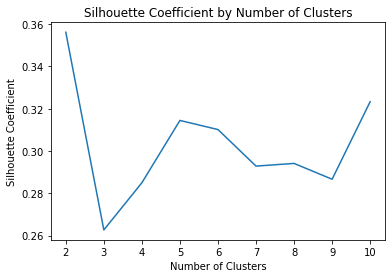

In [26]:
# visualize
# ??quality went way down?
plotMetricByK("Silhouette Coefficient", cluster_quality_scores, kmeans_possible_cluster_nums)

#### Select 6 clusters

In [27]:
# choose k value
kmeans = KMeans(n_clusters=6).fit(df_reduced_variables)
labels = kmeans.labels_

df['low dimension cluster']=labels  # add low dimension clusters

In [28]:
labels

array([2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 2, 5, 5, 4, 5,
       4, 4, 5, 1, 5, 1, 1, 1, 1, 1, 4, 4, 1, 4, 1, 4, 1, 1, 4, 4, 4, 1,
       4, 1, 1, 5, 1, 4, 1, 1, 2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 2, 5, 2, 2,
       5, 2, 2, 2, 2, 5, 2, 2, 5, 5, 5, 5, 2, 5, 2, 2, 5, 5, 5, 2, 2, 5,
       5, 5, 5, 2, 0, 2, 0, 5, 5, 2, 5, 5, 2, 2, 2, 5, 2, 5, 5, 2, 5, 5,
       5, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 5, 0, 2, 5, 2, 0, 5, 5, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 5, 5, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 5, 0, 5, 2, 2, 5,
       2, 2, 5, 5, 5, 2, 2, 5, 2, 5, 2, 5, 2, 2, 2, 5, 0, 0, 0, 0, 0, 0,
       5, 0, 5, 0, 0, 0, 5, 0, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5,
       5, 0, 0, 5, 0, 0, 0, 0, 5, 5, 0, 5], dtype=int32)

In [29]:
df.head()

,S IgG1,RBD IgG1,N IgG1,S IgG2,RBD IgG2,N IgG2,S IgG3,RBD IgG3,N IgG3,S IgG4,...,N ADCD_zscore,S NKD-CD107a_zscore,RBD NKD-CD107a_zscore,N NKD-CD107a_zscore,S NKD-MIP1b_zscore,RBD NKD-MIP1b_zscore,N NKD-MIP1b_zscore,NT50_zscore,cluster,low dimension cluster
0,15518.25,11686.50,17408.00,2595.00,2977.5,4418.75,7988.75,10112.75,13740.75,2890.50,...,0.450513,-0.023810,-0.180116,-0.576487,-0.586417,-1.100901,-0.542606,1.019302,0,2
1,2226.50,2343.25,3379.75,2444.75,3850.5,4687.00,2404.00,3399.00,4383.00,2214.75,...,-0.831518,-0.775527,-0.799010,-0.764606,-1.617719,-1.100901,-1.061439,-0.272266,0,5
2,2279.75,2450.00,3741.00,2117.00,2321.0,3298.50,2110.75,2256.25,3009.75,2256.75,...,-0.560026,0.142907,1.699490,-0.285057,0.513107,0.713034,-0.099106,-1.301777,0,5
3,115548.25,93832.00,94973.50,2938.75,2725.0,4380.25,17165.50,14912.00,33445.50,2512.25,...,-2.040266,-0.363199,-0.771504,-0.323606,-0.667148,-0.352029,0.036981,-0.955487,0,5
4,2645.00,2479.00,4630.00,2256.75,2408.5,3449.50,2086.00,2452.50,3574.75,2127.00,...,-2.056404,-0.867817,-0.565206,-0.781568,-1.120830,0.061931,-1.061439,-0.038286,0,5


## **Part 1.5: Answer**

Representative Variables: **N IgG1_zscore, RBD ADCD_zscore, N ADCD_zscore, N IgG2_zscore, RBD FcRg2b_zscore, RBD NKD-CD107a_zscore, NT50_zscore, N ADCP_zscore, N ADNP_zscore, N IgM_zscore, N IgA1_zscore, RBD IgM_zscore** 

How many clusters are there in the numeric variables? **Base on the Silhouette Coefficient, there are 2. However, I choose to use 5 clusters.** is that ok??

Explanation: **The Silhouette Coefficient is closest to 1 for two clusters and is lower for other clusterings. There is a spike in the coefficient at 5-6 clusters. Additionally, the difference between the coefficient for 2 clusters and the coefficient for 5-6 clusters is small. Rather than perform the same summary statistic analysis as before, I wanted to explore if anything relevant was found with 5-6 clusters. I performed kmeans clustering and summary statistics for both 5 clusters and 6 clusters. I found that 5 clusters produced clusters that seemed more clinically relevant.**

## **Part 1.6: Work**

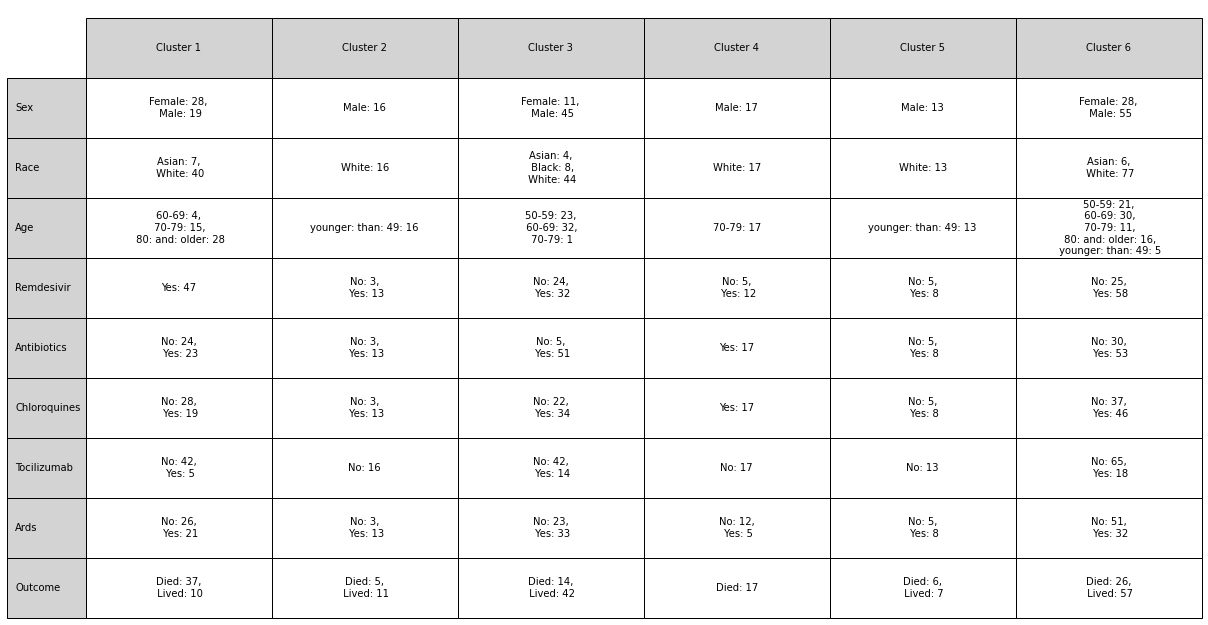

In [30]:
'''
  TODO: Create a table where the rows correspond to the variables in columns 53-61, and the columns correspond to the k clusters you identified.
        in part 1.5. For each cell in the table, put summary statistics for that (variable, cluster) pair
'''
# I didn't find a different number...???

# create 2d list to contain results
rows=6 # clusters
columns=9 # categorical columns
cellText=[[''] * columns for i in range(rows)]


# get summary stats for each categorical column
categorical_cols = df.columns.values.tolist()[52:61]
for i, col in enumerate(categorical_cols):
    for cluster in range(0,rows):
        df_one_cluster = df[df['low dimension cluster']==cluster] # select data for only one cluster
        formatted = formatValueCounts(df_one_cluster[col].value_counts())
        cellText[cluster][i]=formatted

output_table = plotSummaryTable(cellText)
output_table

#### Select 6 clusters

In [31]:
# choose k value
kmeans = KMeans(n_clusters=5).fit(df_reduced_variables)
labels = kmeans.labels_

df['low dimension cluster']=labels  # add low dimension clusters

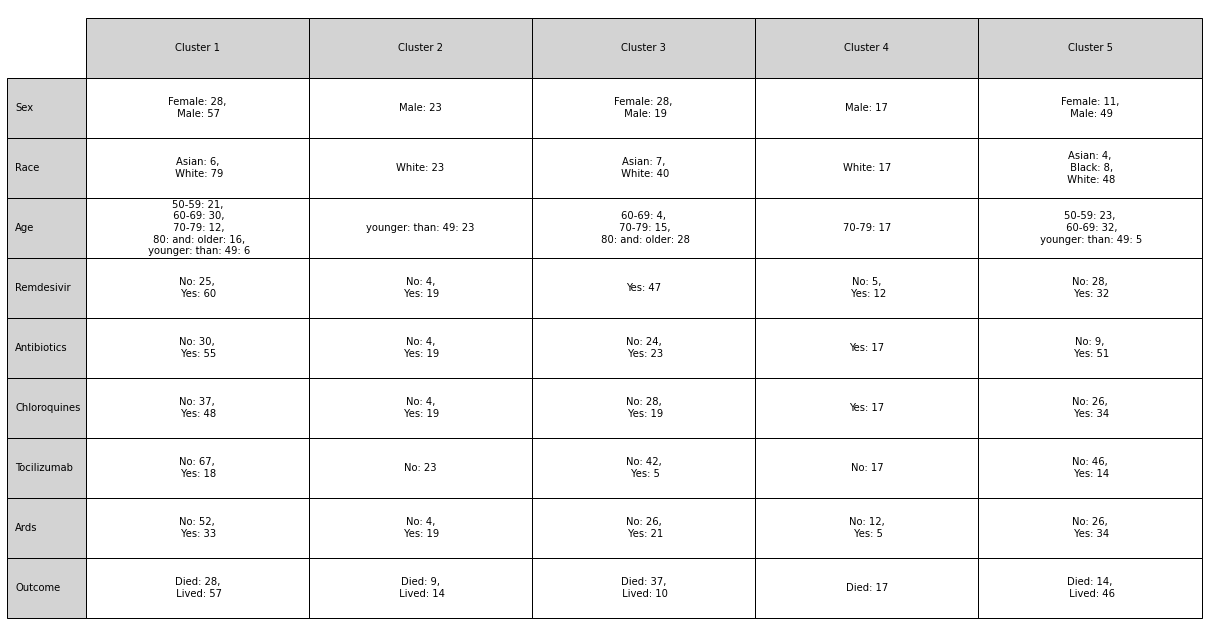

In [32]:
'''
  TODO: Create a table where the rows correspond to the variables in columns 53-61, and the columns correspond to the k clusters you identified.
        in part 1.5. For each cell in the table, put summary statistics for that (variable, cluster) pair
'''
# I didn't find a different number...???

# create 2d list to contain results
rows=5 # clusters
columns=9 # categorical columns
cellText=[[''] * columns for i in range(rows)]


# get summary stats for each categorical column
categorical_cols = df.columns.values.tolist()[52:61]
for i, col in enumerate(categorical_cols):
    for cluster in range(0,rows):
        df_one_cluster = df[df['low dimension cluster']==cluster] # select data for only one cluster
        formatted = formatValueCounts(df_one_cluster[col].value_counts())
        cellText[cluster][i]=formatted

output_table = plotSummaryTable(cellText)
output_table

## **Part 1.6: Answer**

**Plot the table in one of the above cells or include it as an image in this cell**

Are any of the clusters significantly enriched for some particular value? **When clustering into 5 clusters, all of the patients died in Cluster 4. All were white males in their seventies who had been prescribed antibiotics and chloroquines. None had been prescribed Tocilizumab. Cluster 2 consisted entirely of white males younger than 49 who had not been prescribed Tocilizumab. In Cluster 2, just over half the patients lived, so the outcome doesn't appear clinically relevant at this time.**